<a href="https://colab.research.google.com/github/ico1036/QNN/blob/master/Qlearning_randomwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


## Examples for Q-learning: 7 states random work ( table lookup method )  
 ##### * HW of Rainforcement learning class in KNU 2020 06 15   
 ##### * Copyright: **Jiwoong Kim** /  2019324669 / Dept of Physics 
  

### Definition of environments  
![대체 텍스트](https://github.com/ico1036/QNN/blob/master/DataScience/Qlearning/RandomWalk.PNG?raw=true)
- 7 satetes including two terminal states
- 50% go left 50% go right
- Start at point C
- Goal: reach the end of right side

In [0]:
## Define states 
N_STATES = 5
STATES = np.arange(0, N_STATES+2)
START_STATE = 3

END_0 = 0
END_1 = 6
END_STATES = [END_0,END_1]
print(STATES)
print(END_STATES)

[0 1 2 3 4 5 6]
[0, 6]


### Q-Learning  
#### Q(S,A) = Q(S,A) + $\alpha(R + \gamma$ $argmax_{A'}$Q(S',A') - Q(S,A) )  
 - Q(S,A): Action value function of Behavior policy  
 - Q(S',A'): Action value function of Target policy of new step(state)  
 - $\alpha$: learning rate  
 - $\gamma$: Discount factor

#### $\epsilon$ greedy method  
 - $\epsilon$ : Do random action
 - 1-$\epsilon$ : Do greedy action  
Why? : To avoid biased training 

---
Initialize parameters


In [0]:
## Initializer Q tables , Episode, Hyper parameters
episode = 50000
Q = np.zeros([N_STATES+2,2])
dis = 0.999  # Discount factor
e = 0.999 # Episilon
lr=0.1 # Learning rate
print(Q)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


---
Useful functions

In [0]:
## Find Max Q
def qmax_action(four_q):
  # Find Action that maxmize Q
  maxq = np.amax(four_q)
  indices = np.nonzero(four_q == maxq)[0]
  return pr.choice(indices)

In [0]:
## Function for choosing action
def chooseAction(action_arr):
  action = np.random.choice(action_arr)
  return action

In [0]:
## Function for taking action
def takeAction(state,action,end):
  new_state =  state
  if not end:
    if action == 0:
      new_state = state - 1
    else:
      new_state = state + 1

    if new_state in [END_0, END_1]:
      end = True
  state = new_state
  return state,end

In [0]:
## Function for giving reward
def giveReward(state):
  if state == END_0:
    return 1
  if state == END_1:
    return 4
# other states
  return 0

---
Play Episode

In [0]:
## Play Epidose

for i in range(episode):
  end =False
  state = START_STATE
  arr_state = [state]

  action_arr = [1,0] 
  while not end:
    
    #print("roll")
    if np.random.rand(1) <  e:
      action = chooseAction(action_arr)
    else:
      action = np.argmax(Q[state, :])

    new_state,end = takeAction(state,action,end)
    reward = giveReward(new_state)
    arr_state.append(new_state)
    #print(state, new_state)

    # Q-learning
    Q[state, action] = Q[state,action] + lr*(reward + \
                  dis * np.max(Q[new_state, :]) - Q[state,action])
    

    state = new_state

  
print(Q) # Print out final Q-table

[[0.         0.        ]
 [1.         3.98402398]
 [3.98003996 3.988012  ]
 [3.98402398 3.992004  ]
 [3.988012   3.996     ]
 [3.992004   4.        ]
 [0.         0.        ]]


---
Visualize last episode

arr state:  [3, 4, 3, 4, 3, 2, 3, 2, 1, 2, 1, 2, 3, 4, 3, 2, 3, 4, 5, 4, 5, 6]


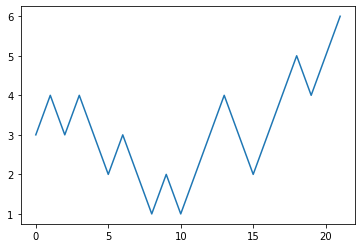

In [0]:
# Show the results of final episode
print("arr state: ",arr_state)
plt.plot(np.arange(len(arr_state)),arr_state)
plt.show()